## RNN Model Testing Notebook

### Import Libs

In [12]:
import os
import numpy as np
import pandas as pd
import keras
import matplotlib.pyplot as plt
from data_preprocessing import NusaXSentimentDataProcessor
from rnn import RNNModel


### Import Dataset

In [13]:
data_dir = '../../indonesian'
data_processor = NusaXSentimentDataProcessor(data_dir,sequence_length = 10)
print("Preparing data...")
(x_train, y_train), (x_val, y_val), (x_test, y_test) = data_processor.prepare_data()


Preparing data...
Unique labels found: {'negative', 'positive', 'neutral'}
Train data: 500 samples
Validation data: 100 samples
Test data: 400 samples


### Model Creation

In [14]:
from tensorflow import keras
import tensorflow as tf

def create_and_train_model(x_train, 
                           y_train, 
                           x_val, 
                           y_val, 
                           vocab_size, 
                           num_classes, 
                           model_type='lstm',
                           embedding_dim = 128, 
                           hidden_units=64,
                           epoch=10,
                           batch_size=32,
                           num_layers=1):
    model = keras.Sequential()
    model.add(keras.layers.Embedding(vocab_size, embedding_dim))

    if model_type.lower() == 'simplernn':
        for _ in range(num_layers - 1):
            model.add(keras.layers.SimpleRNN(hidden_units, return_sequences=True))
        model.add(keras.layers.SimpleRNN(hidden_units))
    elif model_type.lower() == 'bidirectional_rnn':
        for _ in range(num_layers - 1):
            model.add(keras.layers.Bidirectional(keras.layers.SimpleRNN(hidden_units, return_sequences=True)))
        model.add(keras.layers.Bidirectional(keras.layers.SimpleRNN(hidden_units)))
    else:
        raise ValueError("model_type harus salah satu dari: 'simplernn', 'bidirectional_rnn")

    model.add(keras.layers.Dropout(0.2))
    model.add(keras.layers.Dense(num_classes, activation='softmax'))

    model.compile(
        optimizer='adam',
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )

    print(f"\nTraining {model_type.upper()} model with {num_classes} classes...")
    history = model.fit(
        x_train, y_train,
        validation_data=(x_val, y_val),
        epochs=epoch,
        batch_size=batch_size
    )

    return model, history

def preprocess_text_for_prediction(processor: NusaXSentimentDataProcessor, text: str):
    if processor.vectorize_layer is None:
        raise ValueError("Vectorize layer belum diadaptasi. Jalankan prepare_data() dulu.")

    vectorized = processor.vectorize_text(tf.constant([text]))
    return vectorized.numpy()

In [15]:
vocab_size = data_processor.get_vocabulary_size()
num_classes = data_processor.get_num_classes()

### Utlity Function

In [ ]:

def plot_loss(hist, title='Training and Validation Loss'):
    loss = hist.history.get("loss")
    val_loss = hist.history.get("val_loss")

    plt.figure(figsize=(8, 5))
    plt.plot(loss, label='Train Loss', color='blue')
    plt.plot(val_loss, label='Validation Loss', color='red')
    plt.title(title)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.show()

### Testing

#### 1.1 Single Layered RNN


Training SIMPLERNN model with 3 classes...
Epoch 1/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.3688 - loss: 1.0871 - val_accuracy: 0.4000 - val_loss: 1.0525
Epoch 2/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7540 - loss: 0.8027 - val_accuracy: 0.5200 - val_loss: 0.9670
Epoch 3/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9489 - loss: 0.3576 - val_accuracy: 0.5500 - val_loss: 0.9824
Epoch 4/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9937 - loss: 0.0642 - val_accuracy: 0.4800 - val_loss: 1.1649
Epoch 5/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9994 - loss: 0.0308 - val_accuracy: 0.5000 - val_loss: 1.3185
Epoch 6/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9998 - loss: 0.0138 - val_accuracy: 0.5000 - val_loss: 1.3247
Epoch 7/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 1.0000 - loss: 0.0085 - val_accuracy: 0.5000 - val_loss: 1.3663
Epoch 8/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 1.0000 - lo

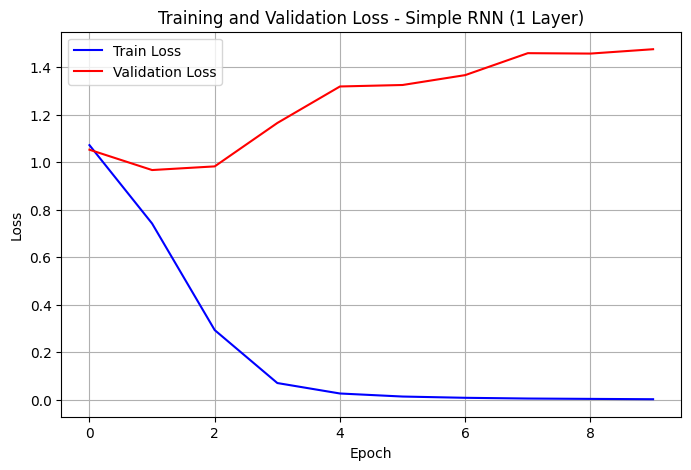

In [17]:
model_rnn_single_layer, hist = create_and_train_model(
    x_train, 
    y_train, 
    x_val, 
    y_val, 
    vocab_size, 
    num_classes, 
    'simplernn', 
    embedding_dim=128,
    hidden_units=64,
    epoch=10, 
    batch_size=32,
    num_layers=1)

custom_model_rnn_single_layer = RNNModel(model_rnn_single_layer)
custom_model_rnn_single_layer.evaluate(x_test, y_test, return_output=False)
plot_loss(hist, "Training and Validation Loss - Simple RNN (1 Layer)")


#### 1.2 Double Layered RNN


Training SIMPLERNN model with 3 classes...
Epoch 1/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.3721 - loss: 1.1047 - val_accuracy: 0.5300 - val_loss: 1.0068
Epoch 2/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7960 - loss: 0.6197 - val_accuracy: 0.5800 - val_loss: 0.9351
Epoch 3/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9499 - loss: 0.1906 - val_accuracy: 0.5400 - val_loss: 1.0688
Epoch 4/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9984 - loss: 0.0389 - val_accuracy: 0.5000 - val_loss: 1.3853
Epoch 5/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 1.0000 - loss: 0.0142 - val_accuracy: 0.5500 - val_loss: 1.4432
Epoch 6/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 1.0000 - loss: 0.0070 - val_accuracy: 0.5300 - val_loss: 1.4583
Epoch 7/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 1.0000 - loss: 0.0045 - val_accuracy: 0.5300 - val_loss: 1.4973
Epoch 8/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 1.0000 - lo

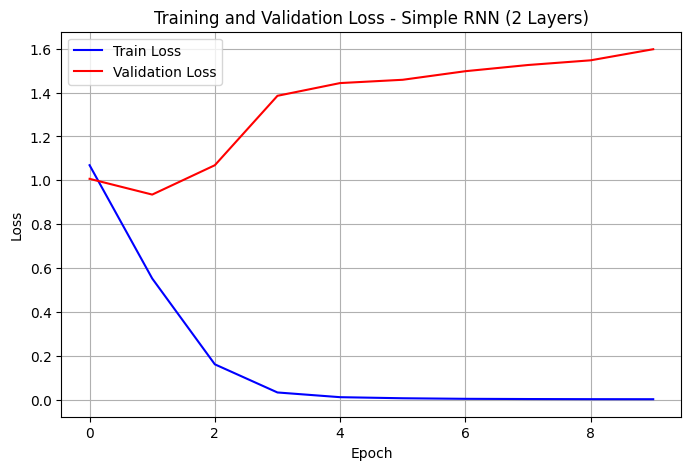

In [18]:
model_rnn_double_layer, hist = create_and_train_model(
    x_train, 
    y_train, 
    x_val, 
    y_val, 
    vocab_size, 
    num_classes, 
    'simplernn', 
    embedding_dim=128,
    hidden_units=64,
    epoch=10, 
    batch_size=32,
    num_layers=2)

custom_model_rnn_double_layer = RNNModel(model_rnn_double_layer)
custom_model_rnn_double_layer.evaluate(x_test, y_test, return_output=False)
plot_loss(hist, "Training and Validation Loss - Simple RNN (2 Layers)")


#### 1.3 Triple Layered RNN


Training SIMPLERNN model with 3 classes...
Epoch 1/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 0.4085 - loss: 1.1148 - val_accuracy: 0.4700 - val_loss: 1.0457
Epoch 2/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8266 - loss: 0.5232 - val_accuracy: 0.5000 - val_loss: 1.0460
Epoch 3/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9794 - loss: 0.1505 - val_accuracy: 0.4700 - val_loss: 1.2892
Epoch 4/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9989 - loss: 0.0379 - val_accuracy: 0.5100 - val_loss: 1.4163
Epoch 5/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 1.0000 - loss: 0.0121 - val_accuracy: 0.5100 - val_loss: 1.5460
Epoch 6/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 1.0000 - loss: 0.0092 - val_accuracy: 0.5200 - val_loss: 1.5645
Epoch 7/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 1.0000 - loss: 0.0057 - val_accuracy: 0.5200 - val_loss: 1.5899
Epoch 8/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 1.0000 - lo

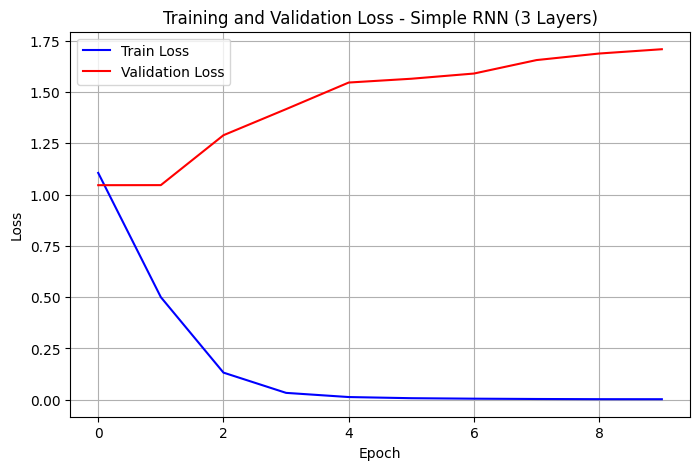

In [19]:
model_rnn_triple_layer, hist = create_and_train_model(
    x_train, 
    y_train, 
    x_val, 
    y_val, 
    vocab_size, 
    num_classes, 
    'simplernn', 
    embedding_dim=128,
    hidden_units=64,
    epoch=10, 
    batch_size=32,
    num_layers=3)

custom_model_rnn_triple_layer = RNNModel(model_rnn_triple_layer)
custom_model_rnn_triple_layer.evaluate(x_test, y_test, return_output=False)
plot_loss(hist, "Training and Validation Loss - Simple RNN (3 Layers)")

#### 2.1 16 Cells RNN


Training SIMPLERNN model with 3 classes...
Epoch 1/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.3826 - loss: 1.0816 - val_accuracy: 0.5100 - val_loss: 1.0542
Epoch 2/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7865 - loss: 0.8389 - val_accuracy: 0.5200 - val_loss: 0.9950
Epoch 3/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9419 - loss: 0.5736 - val_accuracy: 0.5400 - val_loss: 0.9252
Epoch 4/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9835 - loss: 0.3376 - val_accuracy: 0.5900 - val_loss: 0.9173
Epoch 5/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9927 - loss: 0.1926 - val_accuracy: 0.5600 - val_loss: 0.9417
Epoch 6/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9979 - loss: 0.1299 - val_accuracy: 0.5700 - val_loss: 0.9760
Epoch 7/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 1.0000 - loss: 0.0991 - val_accuracy: 0.5700 - val_loss: 0.9840
Epoch 8/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 1.0000 - lo

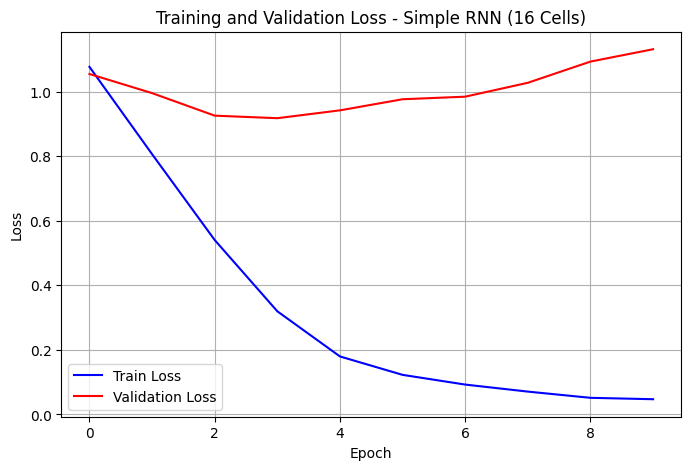

In [20]:
model_rnn_16_cells, hist = create_and_train_model(
    x_train, 
    y_train, 
    x_val, 
    y_val, 
    vocab_size, 
    num_classes, 
    'simplernn', 
    embedding_dim=128,
    hidden_units=16,
    epoch=10, 
    batch_size=32,
    num_layers=1)

custom_model_rnn_16_cells = RNNModel(model_rnn_16_cells)
custom_model_rnn_16_cells.evaluate(x_test, y_test, return_output=False)
plot_loss(hist, "Training and Validation Loss - Simple RNN (16 Cells)")

#### 2.3 64 Cells RNN


Training SIMPLERNN model with 3 classes...
Epoch 1/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.3986 - loss: 1.0796 - val_accuracy: 0.4100 - val_loss: 1.0334
Epoch 2/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8040 - loss: 0.7536 - val_accuracy: 0.4900 - val_loss: 0.9467
Epoch 3/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9594 - loss: 0.2637 - val_accuracy: 0.4900 - val_loss: 1.0870
Epoch 4/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9837 - loss: 0.0657 - val_accuracy: 0.5100 - val_loss: 1.2359
Epoch 5/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9984 - loss: 0.0283 - val_accuracy: 0.4700 - val_loss: 1.3219
Epoch 6/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 1.0000 - loss: 0.0120 - val_accuracy: 0.5100 - val_loss: 1.4514
Epoch 7/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 1.0000 - loss: 0.0072 - val_accuracy: 0.5000 - val_loss: 1.5179
Epoch 8/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 1.0000 - lo

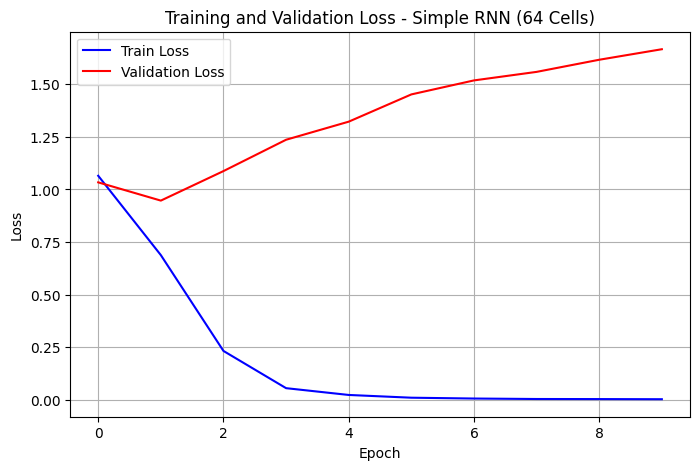

In [21]:
model_rnn_64_cells, hist = create_and_train_model(
    x_train, 
    y_train, 
    x_val, 
    y_val, 
    vocab_size, 
    num_classes, 
    'simplernn', 
    embedding_dim=128,
    hidden_units=64,
    epoch=10, 
    batch_size=32,
    num_layers=1)

custom_model_rnn_64_cells = RNNModel(model_rnn_64_cells)
custom_model_rnn_64_cells.evaluate(x_test, y_test, return_output=False)
plot_loss(hist, "Training and Validation Loss - Simple RNN (64 Cells)")

#### 2.3 128 Cells RNN


Training SIMPLERNN model with 3 classes...
Epoch 1/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.4267 - loss: 1.0642 - val_accuracy: 0.5700 - val_loss: 0.9880
Epoch 2/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7692 - loss: 0.6502 - val_accuracy: 0.6100 - val_loss: 0.8887
Epoch 3/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9492 - loss: 0.2114 - val_accuracy: 0.6300 - val_loss: 0.9520
Epoch 4/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9930 - loss: 0.0352 - val_accuracy: 0.6200 - val_loss: 1.1159
Epoch 5/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9854 - loss: 0.0326 - val_accuracy: 0.6100 - val_loss: 1.2201
Epoch 6/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9969 - loss: 0.0124 - val_accuracy: 0.6100 - val_loss: 1.1262
Epoch 7/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 1.0000 - loss: 0.0057 - val_accuracy: 0.5900 - val_loss: 1.1730
Epoch 8/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 1.0000 - lo

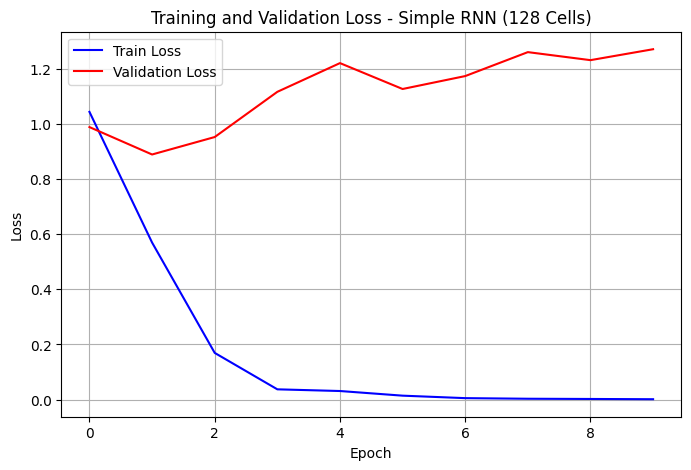

In [22]:
model_rnn_128_cells, hist = create_and_train_model(
    x_train, 
    y_train, 
    x_val, 
    y_val, 
    vocab_size, 
    num_classes, 
    'simplernn', 
    embedding_dim=128,
    hidden_units=128,
    epoch=10, 
    batch_size=32,
    num_layers=1)

custom_model_rnn_128_cells = RNNModel(model_rnn_128_cells)
custom_model_rnn_128_cells.evaluate(x_test, y_test, return_output=False)
plot_loss(hist, "Training and Validation Loss - Simple RNN (128 Cells)")

#### 3.1 Unidirectional RNN


Training SIMPLERNN model with 3 classes...
Epoch 1/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.3718 - loss: 1.0882 - val_accuracy: 0.4500 - val_loss: 1.0247
Epoch 2/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7397 - loss: 0.7753 - val_accuracy: 0.5000 - val_loss: 0.9773
Epoch 3/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9328 - loss: 0.3243 - val_accuracy: 0.5500 - val_loss: 1.0631
Epoch 4/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9785 - loss: 0.0985 - val_accuracy: 0.5500 - val_loss: 1.2821
Epoch 5/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9962 - loss: 0.0303 - val_accuracy: 0.5100 - val_loss: 1.4565
Epoch 6/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9970 - loss: 0.0139 - val_accuracy: 0.5200 - val_loss: 1.4973
Epoch 7/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 1.0000 - loss: 0.0072 - val_accuracy: 0.5200 - val_loss: 1.6471
Epoch 8/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 1.0000 - lo

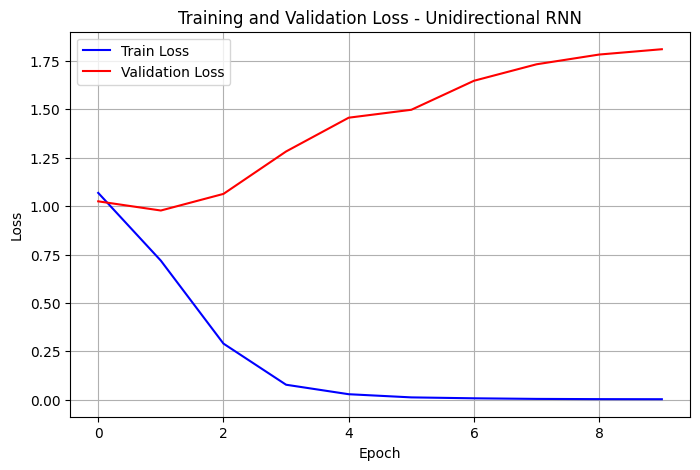

In [23]:
model_rnn_unidirectional, hist = create_and_train_model(
    x_train, 
    y_train, 
    x_val, 
    y_val, 
    vocab_size, 
    num_classes, 
    'simplernn', 
    embedding_dim=128,
    hidden_units=64,
    epoch=10, 
    batch_size=32,
    num_layers=1)

custom_model_rnn_unidirectional = RNNModel(model_rnn_unidirectional)
custom_model_rnn_unidirectional.evaluate(x_test, y_test, return_output=False)
plot_loss(hist, "Training and Validation Loss - Unidirectional RNN")

#### 3.2 Bidirectional RNN


Training BIDIRECTIONAL_RNN model with 3 classes...
Epoch 1/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.3604 - loss: 1.0852 - val_accuracy: 0.4500 - val_loss: 1.0492
Epoch 2/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8260 - loss: 0.7528 - val_accuracy: 0.4700 - val_loss: 1.0507
Epoch 3/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9533 - loss: 0.3228 - val_accuracy: 0.5200 - val_loss: 1.2223
Epoch 4/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9955 - loss: 0.0413 - val_accuracy: 0.5100 - val_loss: 1.4558
Epoch 5/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 1.0000 - loss: 0.0079 - val_accuracy: 0.4900 - val_loss: 1.6030
Epoch 6/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 1.0000 - loss: 0.0035 - val_accuracy: 0.5000 - val_loss: 1.6936
Epoch 7/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 1.0000 - loss: 0.0020 - val_accuracy: 0.5100 - val_loss: 1.7368
Epoch 8/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 1.0

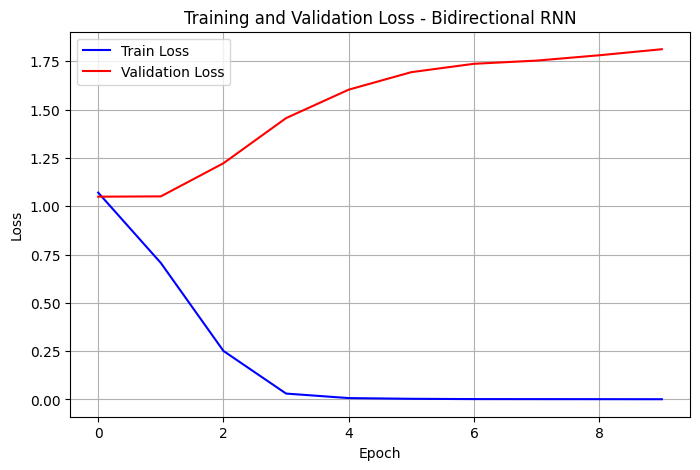

In [24]:
model_rnn_bidirectional, hist = create_and_train_model(
    x_train, 
    y_train, 
    x_val, 
    y_val, 
    vocab_size, 
    num_classes, 
    'bidirectional_rnn', 
    embedding_dim=128,
    hidden_units=64,
    epoch=10, 
    batch_size=32,
    num_layers=1)

custom_model_rnn_bidirectional = RNNModel(model_rnn_bidirectional)
custom_model_rnn_bidirectional.evaluate(x_test, y_test, return_output=False)
plot_loss(hist, "Training and Validation Loss - Bidirectional RNN")

### Save Trained Models

In [27]:
def save_keras_model(model, model_name):
    model_dir = 'saved_models'
    os.makedirs(model_dir, exist_ok=True)
    model_path = os.path.join(model_dir, f"{model_name}.keras")
    model.save(model_path)
    print(f"Model saved to {model_path}")


In [28]:
save_keras_model(model_rnn_single_layer, "rnn_single_layer")
save_keras_model(model_rnn_double_layer, "rnn_double_layer")
save_keras_model(model_rnn_triple_layer, "rnn_triple_layer")
save_keras_model(model_rnn_16_cells, "rnn_16_cells")
save_keras_model(model_rnn_64_cells, "rnn_64_cells")
save_keras_model(model_rnn_128_cells, "rnn_128_cells")
save_keras_model(model_rnn_unidirectional, "rnn_unidirectional")
save_keras_model(model_rnn_bidirectional, "rnn_bidirectional")

Model saved to saved_models\rnn_single_layer.keras
Model saved to saved_models\rnn_double_layer.keras
Model saved to saved_models\rnn_triple_layer.keras
Model saved to saved_models\rnn_16_cells.keras
Model saved to saved_models\rnn_64_cells.keras
Model saved to saved_models\rnn_128_cells.keras
Model saved to saved_models\rnn_unidirectional.keras
Model saved to saved_models\rnn_bidirectional.keras


### Example Load and Use Model

In [30]:
def load_keras_model(model_name):
    model_dir = 'saved_models'
    model_path = os.path.join(model_dir, f"{model_name}.keras")
    if not os.path.exists(model_path):
        raise FileNotFoundError(f"Model {model_name} not found at {model_path}")
    return keras.models.load_model(model_path)

In [31]:
saved_rnn_single_layer = load_keras_model("rnn_single_layer")
custom_model_rnn_single_layer_saved = RNNModel(saved_rnn_single_layer)

custom_model_rnn_single_layer_saved.evaluate(x_test, y_test, return_output=False)

F1 Score (macro): 0.5585
Loss: 1.1942
Accuracy: 0.5650


c:\Files\Source-Code\Kuliah\Code-Semester-6\IF3270_Pembelajaran_Mesin\IF3270_Tubes2_MachineLearning\venv\Lib\site-packages\keras\src\saving\saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 8 variables whereas the saved optimizer has 14 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))
